# Subreddit Classification
## r/saltierthancrait vs r/saltierthankrayt
#### Using sentiment analysis, we will determine which posts live on which subreddit.
##### How do opposing communities compare? Language/Vocab... Topics of Discussion... Racism & Sexism?

In [3]:
import praw
import pandas as pd

# Authentication credentials
reddit = praw.Reddit(
    client_id='GnRQM1oh9j_vXEC9RSbgPw',
    client_secret='BxwThEnfKppNkJWy8BEVxxmADGwt7w',
    user_agent='StarWarsSentiment v0.0 by jqsiv'
)

# Subreddits to scrape
subreddits = {
    'saltierthancrait': 1,  # Label 1
    'saltierthankrayt': 0   # Label 0
}
num_posts = 500  # Number of posts per subreddit

# Data storage
data = {
    'subreddit': [],
    'label': [],
    'title': [],
    'body': [],
    'url': [],
    'score': [],
    'num_comments': []
}

# Scrape posts
for subreddit_name, label in subreddits.items():
    subreddit = reddit.subreddit(subreddit_name)
    
    # Use the 'hot' sort as an example
    posts = subreddit.hot(limit=num_posts)
    
    for post in posts:
        data['subreddit'].append(subreddit_name)
        data['label'].append(label)
        data['title'].append(post.title)
        data['body'].append(post.selftext)
        data['url'].append(post.url)
        data['score'].append(post.score)
        data['num_comments'].append(post.num_comments)

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Save to CSV
# df.to_csv('star_wars_subreddits.csv', index=False)
print("Data scraping completed and saved as star_wars_subreddits.csv")


Data scraping completed and saved as star_wars_subreddits.csv


In [4]:
df.head()

,subreddit,label,title,body,url,score,num_comments
0,saltierthancrait,1,James Earl Jones has passed away today at the ...,[https://variety.com/2024/film/news/james-earl...,https://www.reddit.com/r/saltierthancrait/comm...,3768,168
1,saltierthancrait,1,Official LEGO Star Wars: Rebuild the Galaxy Di...,"As always, comment only if you've actually see...",https://www.reddit.com/r/saltierthancrait/comm...,46,26
2,saltierthancrait,1,The New Jedi Order movie starring Daisy Ridley...,,https://x.com/sw_holocron/status/1837299213987...,584,283
3,saltierthancrait,1,"""There's no source material. We don't have com...",,https://v.redd.it/p75yzsoah7qd1,982,105
4,saltierthancrait,1,Disney is so keen on killing Star Wars that ev...,I was rewatching EFAP’s Ahsoka video and it ma...,https://i.redd.it/gnugevnwjepd1.jpeg,892,107


In [5]:
df.iloc[-1]

subreddit                                        saltierthankrayt
label                                                           0
title           Despite everything Zaslav has done, how come i...
body                                                             
url                        https://www.reddit.com/gallery/1f6jbu9
score                                                          66
num_comments                                                   38
Name: 999, dtype: object

In [10]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Remove rows with empty bodies or titles
df.dropna(subset=['body', 'title'], inplace=True)

# Combine title and body into one field
df['text'] = df['title'] + ' ' + df['body']

# Basic text cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

df['text'] = df['text'].apply(clean_text)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # Limit features for simplicity
X = vectorizer.fit_transform(df['text'])

# Labels for classification
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
X

<1000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 25571 stored elements in Compressed Sparse Row format>

In [9]:
feature_names = vectorizer.get_feature_names_out()
print("Vocabulary:\n", feature_names)

# 2. To view the matrix representation of the documents
matrix = X.toarray()
print("\nDocument-Term Matrix (TF-IDF values):\n", matrix)

Vocabulary:
 ['aaa' 'abandoning' 'abide' ... 'zippermouth' 'zod' 'zone']

Document-Term Matrix (TF-IDF values):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
#1000 features instead of 5000
feature_names = vectorizer.get_feature_names_out()
print("Vocabulary:\n", feature_names)

# 2. To view the matrix representation of the documents
matrix = X.toarray()
print("\nDocument-Term Matrix (TF-IDF values):\n", matrix)

Vocabulary:
 ['ability' 'able' 'absolutely' 'according' 'account' 'acolyte' 'acolytes'
 'act' 'acting' 'action' 'actions' 'actor' 'actors' 'actual' 'actually'
 'admit' 'adventure' 'age' 'ago' 'agree' 'ahsoka' 'ai' 'allowed' 'amazing'
 'anakin' 'anakins' 'analysis' 'andor' 'anger' 'angry' 'aniseya'
 'annoying' 'antiwoke' 'anymore' 'apparently' 'arc' 'arent' 'argue'
 'argument' 'arguments' 'ask' 'asked' 'ass' 'assassins' 'attack'
 'attacking' 'attempt' 'attention' 'audience' 'average' 'awakens' 'away'
 'awesome' 'awful' 'bad' 'barely' 'based' 'basically' 'batch' 'battle'
 'beginning' 'believe' 'best' 'better' 'big' 'biggest' 'bit' 'black'
 'blame' 'boba' 'body' 'bombing' 'book' 'books' 'boring' 'bought' 'boy'
 'break' 'breaking' 'bring' 'bro' 'brought' 'budget' 'build' 'built'
 'bullshit' 'bunch' 'california' 'called' 'calling' 'came' 'cancelled'
 'canon' 'care' 'case' 'cast' 'cause' 'certain' 'chance' 'change'
 'changed' 'channel' 'channels' 'character' 'characters' 'charity' 'cheap'
 '

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the classifier
clf = LogisticRegression()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8100
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       104
           1       0.85      0.74      0.79        96

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



In [17]:
from sklearn.metrics import confusion_matrix
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(predictions)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0
 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0
 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1]
[[91 13]
 [25 71]]


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())


Cross-validation scores: [0.77  0.785 0.755 0.785 0.895]
Average accuracy: 0.798


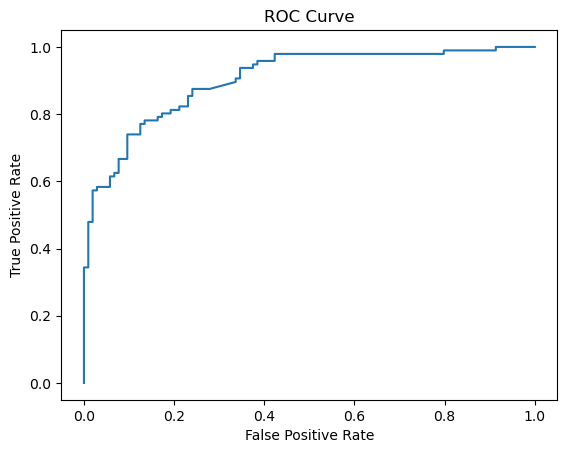

AUC: 0.9033453525641026


In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)


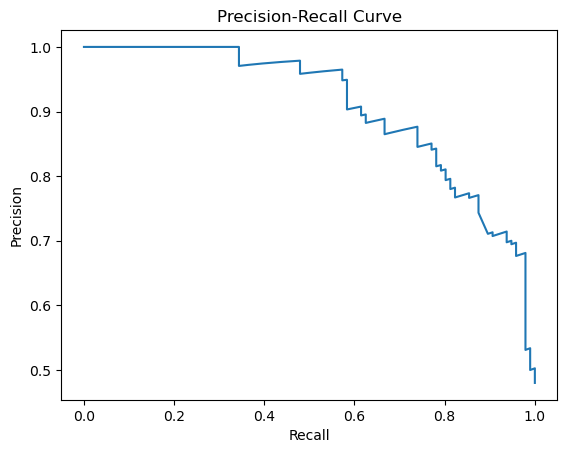

In [21]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [23]:
from sklearn.metrics import log_loss
y_prob = clf.predict_proba(X_test)
loss = log_loss(y_test, y_prob)
print("Log Loss:", loss)


Log Loss: 0.4718789347414864


In [24]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predictions)
print("Cohen's Kappa:", kappa)


Cohen's Kappa: 0.6175523349436394


/Users/jamesstevens/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jamesstevens/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jamesstevens/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jamesstevens/anaconda3/lib/python3.11/site-packages/skle

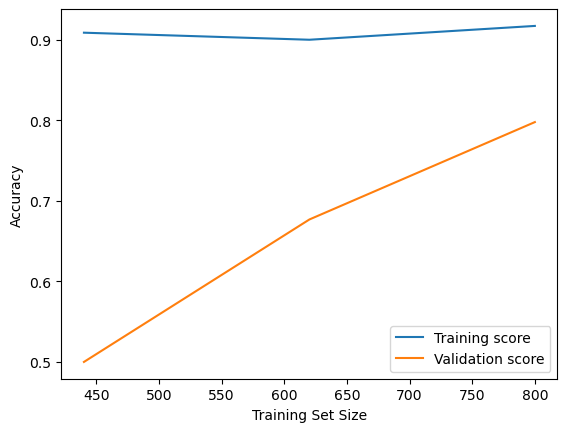

In [25]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(clf, X, y, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [27]:
import numpy as np

feature_importances = clf.coef_[0]  # For logistic regression
feature_names = vectorizer.get_feature_names_out()

top_n = 25  # Show top 10 features
top_features = np.argsort(feature_importances)[-top_n:]

print("Top important features:")
for i in top_features:
    print(feature_names[i], feature_importances[i])


Top important features:
ot 0.7734141755492289
honestly 0.7774052775267378
season 0.7835494177765696
scene 0.7907362388399726
news 0.7910891245522828
favorite 0.8028208349210348
darth 0.813117100907769
lightsabers 0.9301508913015408
sith 0.9707178452469716
dark 0.9932038377850393
sol 1.013098047564277
years 1.021705888111916
luke 1.0352371876264745
star 1.041949142224887
force 1.0549885554502825
master 1.0558970034268313
really 1.0591518189421911
story 1.0710329109658785
osha 1.1283779350528271
wars 1.1463414254554554
power 1.2399410628082879
episode 1.4754475524076553
disney 2.185982920204361
jedi 2.5458724578953267
acolyte 3.5265074072284834
